In [16]:
def generate_circle(rx, ry, rz, r, p):
    r1 = gmsh.model.geo.add_point(rx, ry, rz, p)
    r2 = gmsh.model.geo.add_point(rx + r, ry, rz, p)
    r3 = gmsh.model.geo.add_point(rx, ry + r, rz, p)
    r4 = gmsh.model.geo.add_point(rx - r, ry, rz, p)
    r5 = gmsh.model.geo.add_point(rx, ry - r, rz, p)
    line1 = gmsh.model.geo.addCircleArc(r2, r1, r3)
    line2 = gmsh.model.geo.addCircleArc(r3, r1, r4)
    line3 = gmsh.model.geo.addCircleArc(r4, r1, r5)
    line4 = gmsh.model.geo.addCircleArc(r5, r1, r2)
    curve = gmsh.model.geo.addCurveLoop([line1, line2, line3, line4])
    return curve

In [ ]:
import gmsh
import sys

def create_model(width, height, hole_radius, p_reactangle, p_circle, name):
    gmsh.initialize()

    # Параметры прямоугольника
    p1 = gmsh.model.geo.addPoint(0, 0, 0, p_reactangle)
    p2 = gmsh.model.geo.addPoint(width, 0, 0, p_reactangle)
    p3 = gmsh.model.geo.addPoint(width, height, 0, p_reactangle)
    p4 = gmsh.model.geo.addPoint(0, height, 0, p_reactangle)

    # Создаем линии прямоугольника
    l1 = gmsh.model.geo.addLine(p1, p2)
    l2 = gmsh.model.geo.addLine(p2, p3)
    l3 = gmsh.model.geo.addLine(p3, p4)
    l4 = gmsh.model.geo.addLine(p4, p1)

    # Создаем замкнутый контур прямоугольника
    cl = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])
    # Создаем замкнутый контур отверстия
    cl2 = generate_circle(width / 2, height / 2, 0, hole_radius, p_circle)

    # Создаем плоскую поверхность с отверстием
    ps = gmsh.model.geo.addPlaneSurface([cl, cl2])
    gmsh.model.addPhysicalGroup(1, [cl2])
    gmsh.model.addPhysicalGroup(1, [cl])
    gmsh.model.addPhysicalGroup(2, [ps])
     # Синхронизируем, чтобы завершить построение геометрии
    gmsh.model.geo.synchronize()
    # Генерируем сетку
    gmsh.model.mesh.generate(2)
    gmsh.option.setNumber("Mesh.MshFileVersion", 2)
    # Сохраняем в файл
    gmsh.write(name)

    # Завершаем работу с Gmsh
    gmsh.finalize()

create_model(2, 1, 0.1, 0.1, 0.01, 'model.msh')
create_model(2, 1, 0.1, 0.05, 0.005, 'model1.msh')
create_model(2, 1, 0.1, 0.02, 0.002, 'model2.msh')
create_model(2, 1, 0.1, 0.01, 0.001, 'model3.msh')

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Circle)
Info    : [ 70%] Meshing curve 6 (Circle)
Info    : [ 80%] Meshing curve 7 (Circle)
Info    : [ 90%] Meshing curve 8 (Circle)
Info    : Done meshing 1D (Wall 0.00101195s, CPU 0.002288s)
Info    : Meshing 2D...
Info    : Done meshing 2D (Wall 4.6781e-05s, CPU 0.000177s)
Info    : 125 nodes 133 elements
Info    : Writing 'model.msh'...
Info    : Done writing 'model.msh'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 50%] Meshing curve 5 (Circle)
Info    : [ 70%] Meshing curve 6 (Circle)
Info    : [ 80%] Meshing curve 7 (Circle)
Info    : [ 90%] Meshing curve 8 (Circle)
Info    : Done meshing 1D (Wall 0.00140484s, CPU 0.

In [39]:
import pyvista
print(pyvista.global_theme.jupyter_backend)
pyvista.start_xvfb()
pyvista.set_jupyter_backend("trame")

def show(name):
    p = pyvista.Plotter(window_size=(800, 800))
    mesh = pyvista.read(name)
    p.add_mesh(mesh, show_edges=True)
    if not pyvista.OFF_SCREEN:
        p.view_xy()
        p.show(jupyter_backend='ipykernel')

trame


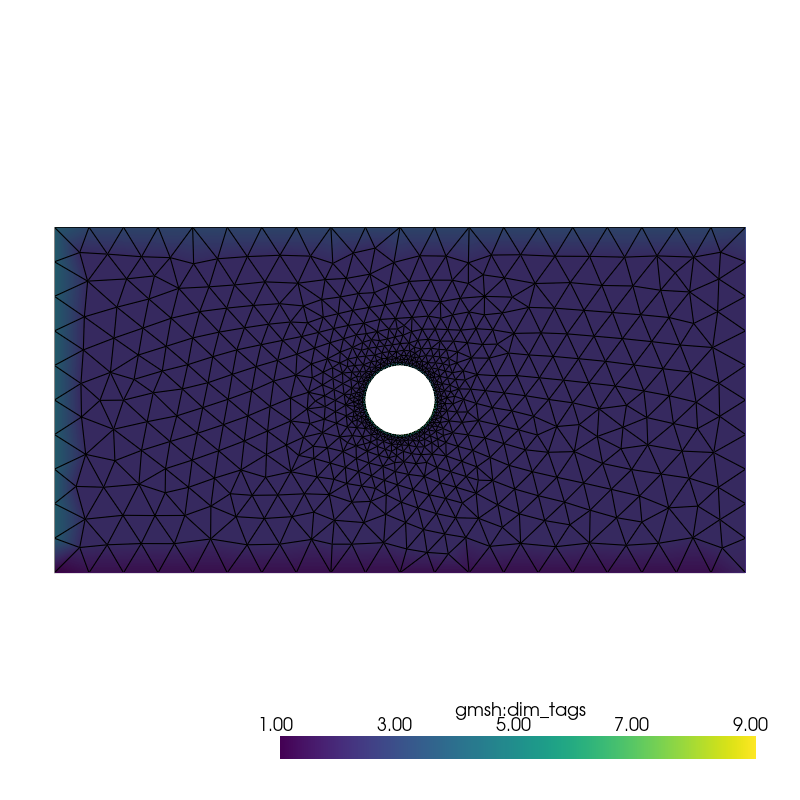

In [44]:
show('model.msh')

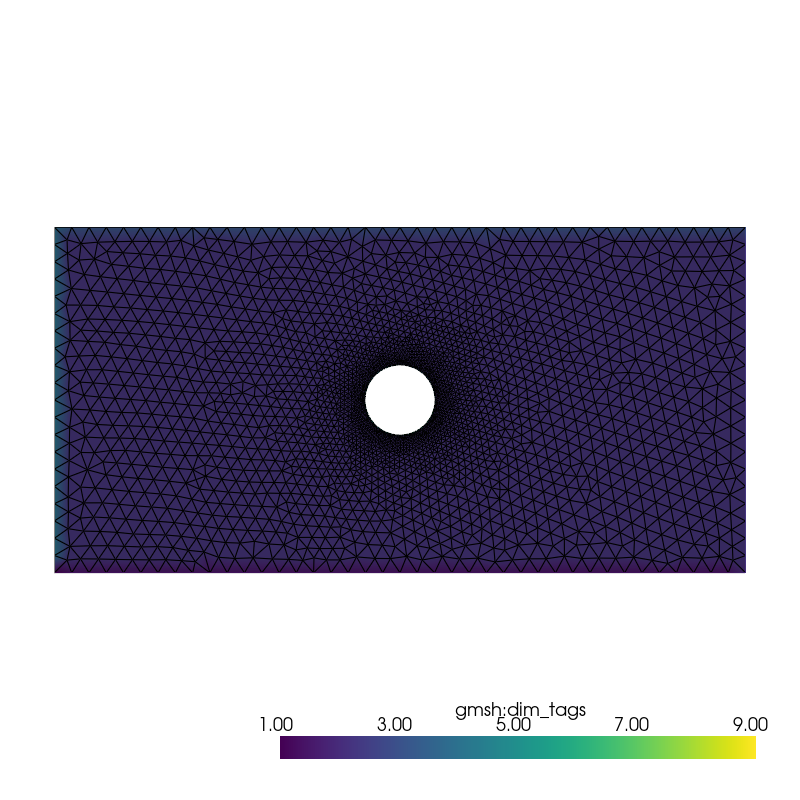

In [45]:
show('model1.msh')

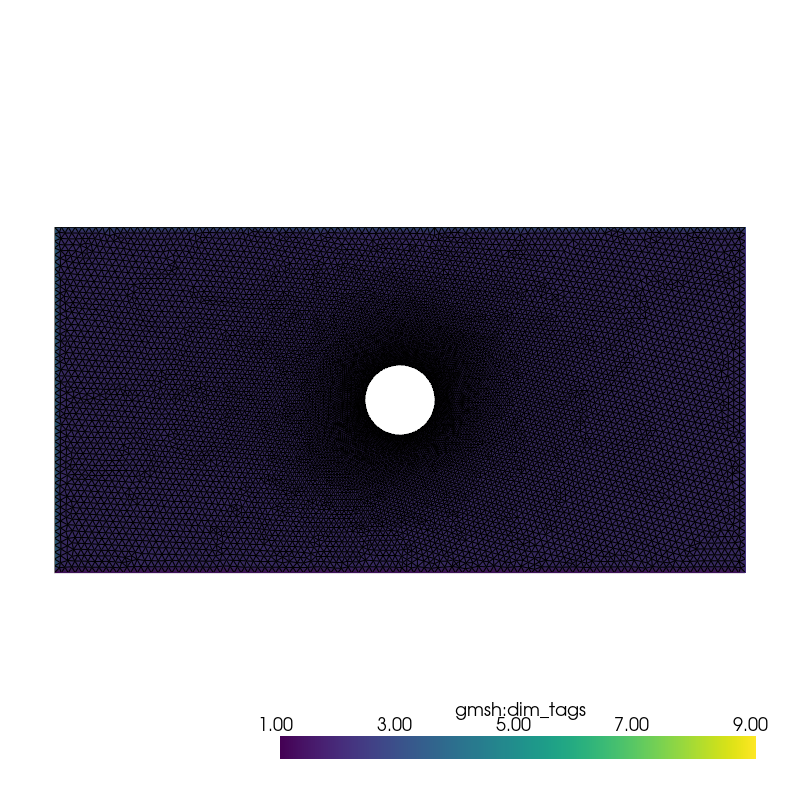

In [46]:
show('model2.msh')

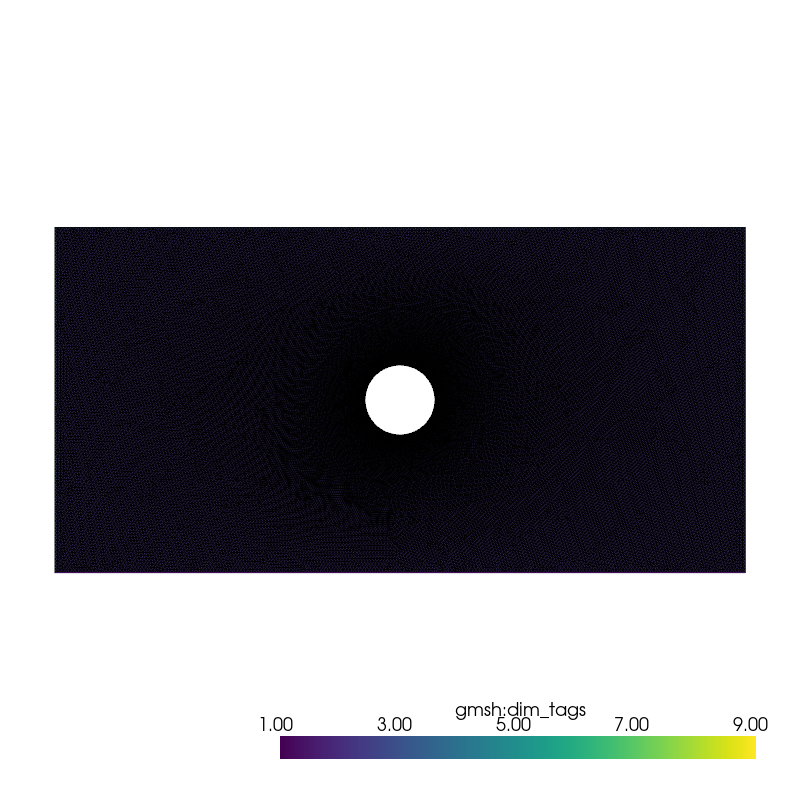

In [47]:
show('model3.msh')

In [132]:
import meshio
def create_mesh(mesh, cell_type, prune_z=False):
    cells = mesh.get_cells_type(cell_type)
    cell_data = mesh.get_cell_data("gmsh:physical", cell_type)
    points = mesh.points[:, :2] if prune_z else mesh.points
    out_mesh = meshio.Mesh(points=points, cells={cell_type: cells}, cell_data={
                           "boundary": [cell_data]})
    return out_mesh

def meshToXml(msh_name, xml_name): 
    mesh_xdmf_file = xml_name+'.xdmf'
    facet_xdmf_file = xml_name+'_facets.xdmf'
    mesh = meshio.read(msh_name)
    line_mesh = create_mesh(mesh, "line", prune_z=True)
    meshio.write(facet_xdmf_file, line_mesh)
    triangle_mesh = create_mesh(mesh, "triangle", prune_z=True)
    meshio.write(mesh_xdmf_file, triangle_mesh)

In [133]:
meshToXml('model.msh', 'model')
meshToXml('model1.msh', 'model1')
meshToXml('model2.msh', 'model2')
meshToXml('model3.msh', 'model3')

In [241]:
from dolfin import *
from dolfin.cpp.mesh import MeshFunctionSizet

In [242]:
def get_mesh(model_file) -> Mesh:
    mesh = Mesh()
    with XDMFFile(model_file) as in_file:
        in_file.read(mesh)
    return mesh
def get_mesh_function(mesh, face_file, number) -> (MeshFunction):
    mvc = MeshValueCollection("size_t", mesh, number)
    with XDMFFile(face_file) as in_file:
        in_file.read(mvc, 'boundary')
    print(mvc.values())
    domains = MeshFunction("size_t", mesh, mvc)
    return domains

In [243]:
mesh = get_mesh('model.xdmf')
domains = get_mesh_function(mesh, 'model.xdmf', 2)
boundaries = get_mesh_function(mesh, 'model_facets.xdmf', 1)

{(0, 0): 3, (1, 0): 3, (2, 0): 3, (3, 0): 3, (4, 0): 3, (5, 0): 3, (6, 0): 3, (7, 0): 3, (8, 0): 3, (9, 0): 3, (10, 0): 3, (11, 0): 3, (12, 0): 3, (13, 0): 3, (14, 0): 3, (15, 0): 3, (16, 0): 3, (17, 0): 3, (18, 0): 3, (19, 0): 3, (20, 0): 3, (21, 0): 3, (22, 0): 3, (23, 0): 3, (24, 0): 3, (25, 0): 3, (26, 0): 3, (27, 0): 3, (28, 0): 3, (29, 0): 3, (30, 0): 3, (31, 0): 3, (32, 0): 3, (33, 0): 3, (34, 0): 3, (35, 0): 3, (36, 0): 3, (37, 0): 3, (38, 0): 3, (39, 0): 3, (40, 0): 3, (41, 0): 3, (42, 0): 3, (43, 0): 3, (44, 0): 3, (45, 0): 3, (46, 0): 3, (47, 0): 3, (48, 0): 3, (49, 0): 3, (50, 0): 3, (51, 0): 3, (52, 0): 3, (53, 0): 3, (54, 0): 3, (55, 0): 3, (56, 0): 3, (57, 0): 3, (58, 0): 3, (59, 0): 3, (60, 0): 3, (61, 0): 3, (62, 0): 3, (63, 0): 3, (64, 0): 3, (65, 0): 3, (66, 0): 3, (67, 0): 3, (68, 0): 3, (69, 0): 3, (70, 0): 3, (71, 0): 3, (72, 0): 3, (73, 0): 3, (74, 0): 3, (75, 0): 3, (76, 0): 3, (77, 0): 3, (78, 0): 3, (79, 0): 3, (80, 0): 3, (81, 0): 3, (82, 0): 3, (83, 0): 3, (

In [244]:
mesh.num_entities(2)

1448

In [245]:
V = VectorFunctionSpace(mesh, 'CG', 1)

u = TrialFunction(V)
v = TestFunction(V)

In [246]:
class Source(UserExpression):
    def eval(self, values, x):
        values[0] = 2 * x[0] * x[1]
        values[1] = x[0] * x[0] + x[1] * x[1]
    def value_shape(self):
        return (2,)

In [247]:
T = Constant(5)
k = Constant(0.1)
lamda = 90
mu = 45
f = Source(degree=2)
theta1 = Expression('2 * pi * x[0]', degree = 2)
theta2 = Expression('2 * pi * x[1]', degree = 2)
ubound = Expression(('exp(-x[0]*x[0]/2)', 'cos(pi * x[1])'), degree = 2)
Tbound = Expression(('Tbou * cos(theta1)', 'Tbou*sin(theta2)'), degree = 2, Tbou=T, theta1 = theta1, theta2 = theta2)

In [248]:
bc_1 = DirichletBC(V, ubound, boundaries, 1)
bc_2 = DirichletBC(V, Tbound, boundaries, 2)

In [249]:
bcs = [bc_1, bc_2]

In [250]:
dx = Measure('dx', domain = mesh, subdomain_data= domains)
ds = Measure('ds', domain = mesh, subdomain_data= domains)

In [251]:
d = u.geometric_dimension()

def epsilon(u):
    return 0.5 * (nabla_grad(u) + nabla_grad(u).T)

def sigma(u):
    return lamda*nabla_grad(u) * Identity(d) + 2*mu*epsilon(u)

In [252]:
a = inner(sigma(u), epsilon(v))*dx
L = dot(f, v) * dx + dot(Tbound, v) * ds(5)

In [253]:
u = Function(V)
solve(a == L, u, bcs)

Solving linear variational problem.


In [254]:
file_u = File('results/model.pvd')
file_u << u

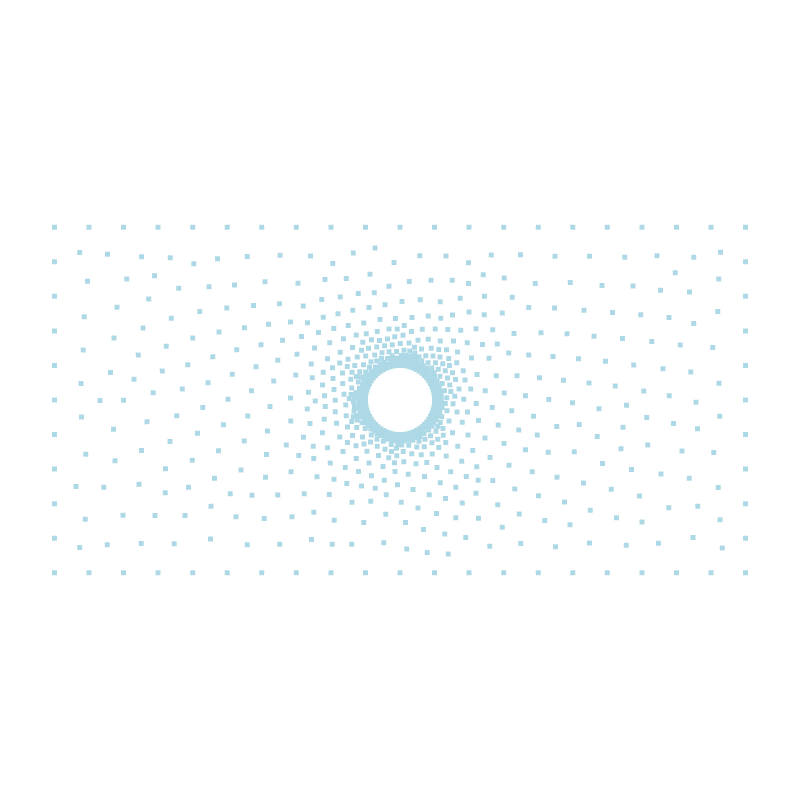

In [258]:
p = pyvista.Plotter(window_size=(800, 800))
mesh = pyvista.read('results/model.pvd')
p.add_mesh(mesh, style="points")
if not pyvista.OFF_SCREEN:
    p.view_xy()
    p.show(jupyter_backend='ipykernel')

In [224]:
import matplotlib.pyplot as plt

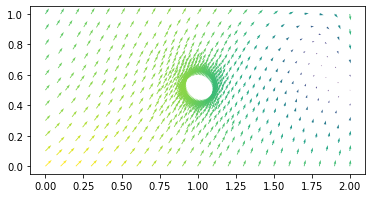

In [235]:
plot(u)